# Image classification with a model pretrained on ImageNet

## Import statements

In [36]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
from keras.applications.resnet import decode_predictions
from keras.applications.resnet import ResNet50
import os
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

## Classification

files in current folder : ['adversarial_bus1.PNG', 'adversarial_bus2.PNG', 'bus.PNG', 'payload_01_01.PNG', 'payload_01_02.PNG', 'payload_01_03.PNG', 'payload_02_01.PNG', 'payload_02_02.PNG', 'payload_02_03.PNG', 'payload_03_01.PNG', 'payload_03_02.PNG', 'payload_03_03.PNG']
current : adversarial_bus1.PNG


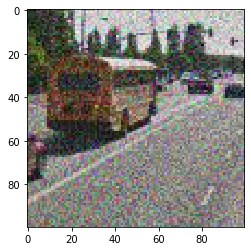

sunglass (38.90%)
current : adversarial_bus2.PNG


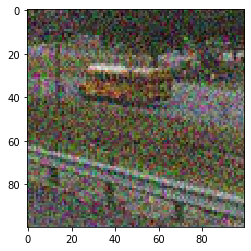

skunk (69.09%)
current : bus.PNG


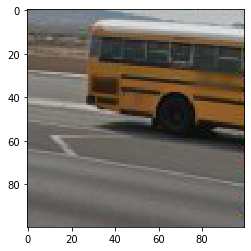

school_bus (99.71%)
current : payload_01_01.PNG


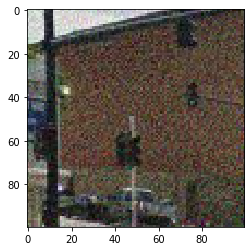

horizontal_bar (36.92%)
current : payload_01_02.PNG


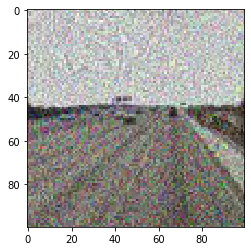

rifle (12.09%)
current : payload_01_03.PNG


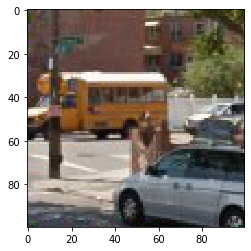

minibus (30.22%)
current : payload_02_01.PNG


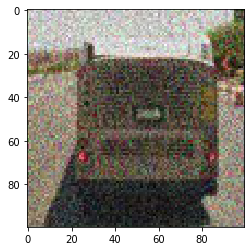

toilet_seat (13.27%)
current : payload_02_02.PNG


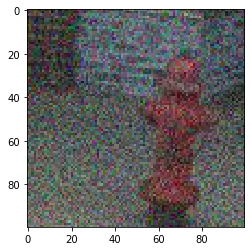

skunk (16.75%)
current : payload_02_03.PNG


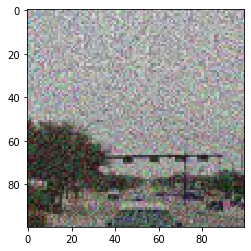

skunk (63.71%)
current : payload_03_01.PNG


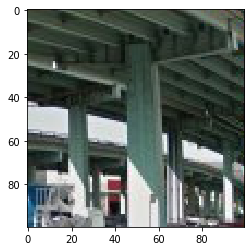

pier (37.00%)
current : payload_03_02.PNG


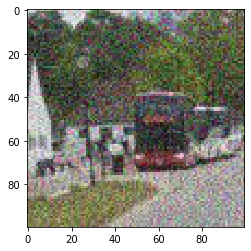

skunk (18.43%)
current : payload_03_03.PNG


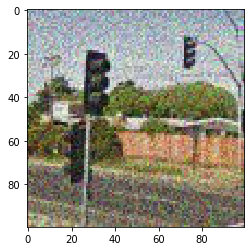

parking_meter (10.65%)


In [35]:
folder_path = '/Users/benji/Desktop/UTC/GI01/captchas/pretrained_test_images/'
files_list = os.listdir(folder_path)
files_list.sort()
print("files in current folder :",files_list)

# Load every image in the directory
for filename in files_list:
    print(f'current : {filename}')
    # load an image from file
    image = load_img(folder_path + filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    
    data = asarray(Image.open(folder_path + filename)) # loading images as numpy array
    data = data[:,:,:3] # removing alpha channel (if any)

    plt.imshow(data, interpolation='nearest')
    plt.show()
    
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load the model
    model = ResNet50()
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))